# **1. 타이타닉의 생존자 데이터 분석 준비하기**

### 1) 데이터 분석 준비하기

(1) 패키지 준비하기

In [ ]:
library(ggplot2)
library(dplyr)
library(stringr)

(2) 데이터 준비하기

In [ ]:
# 데이터 불러오기
titanic_data <- read.csv("titanic_data.csv")

##### (3) 데이터 검토하기

In [ ]:
str(titanic_data)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Gender     : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


PassengerID : 승객 고유번호 Survived : 생존여부 0=No/ 1=Yes Pclass : 1등급, 2등급, 3등급 ** int형으로 되어있기에 factor형으로 변경필요 Name : 승객명 ** factor형으로 되어있기에 character형으로 변경필요 Sex : 성별 SibSp: 함께 탑승한 배우자 또는 형제의 수 Ticket : 티켓번호 ** factor형으로 되어있기에 character형으로 변경필요 Fare : 티켓요금 Cabin : 선실번호 ** factor형으로 되어있기에 character형으로 변경필요 Embarked : 탑승한 곳 각각 “C”, “Q”, “S”는 탑승한 곳을 뜻하는 것으로 예상

전처리(factor형-> character형으로 변경)

In [ ]:
titanic_data$Pclass <- as.factor(titanic_data$Pclass)
titanic_data$Name <- as.character(titanic_data$Name)
titanic_data$Ticket <- as.character(titanic_data$Ticket)
titanic_data$Cabin <- as.character(titanic_data$Cabin)

str(titanic_data)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Gender     : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [ ]:
head(titanic_data)
tail (titanic_data)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<fct>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<fct>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [ ]:
View(titanic_data)

PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<fct>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


In [ ]:
dim(titanic_data)

[1] 891  12

In [ ]:
summary(titanic_data)

  PassengerId       Survived      Pclass      Name              Gender         
 Min.   :  1.0   Min.   :0.0000   1:216   Length:891         Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   2:184   Class :character   Class :character  
 Median :446.0   Median :0.0000   3:491   Mode  :character   Mode  :character  
 Mean   :446.0   Mean   :0.3838                                                
 3rd Qu.:668.5   3rd Qu.:1.0000                                                
 Max.   :891.0   Max.   :1.0000                                                
                                                                               
      Age            SibSp           Parch           Ticket         
 Min.   : 0.42   Min.   :0.000   Min.   :0.0000   Length:891        
 1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000   Class :character  
 Median :28.00   Median :0.000   Median :0.0000   Mode  :character  
 Mean   :29.70   Mean   :0.523   Mean   :0.3816                     
 3rd Qu.:38.00 

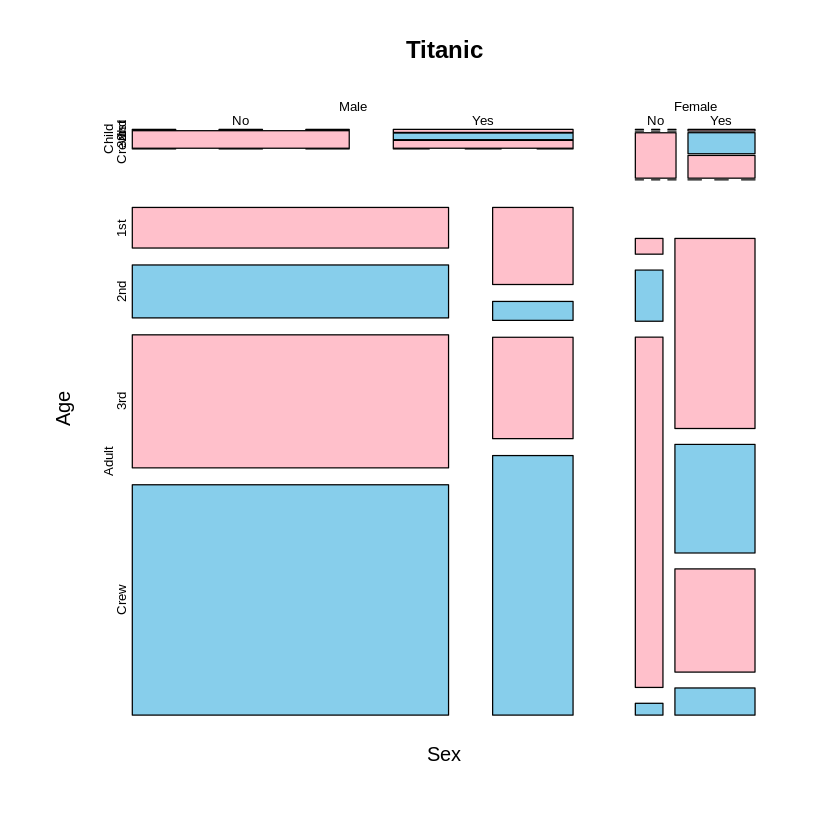

In [ ]:
#전체 생존률 시각화 오렌지색은 생존, 하늘색은 사망
mosaicplot(~ Sex + Age + Survived + Class, data = Titanic,
           color =c("pink","skyblue") )

(4) 결측치

In [ ]:
sum(is.na(titanic_data))

[1] 177

In [ ]:
sapply(titanic_data, function(x){
  sum(is.na(x))
})

PassengerId    Survived      Pclass        Name      Gender         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [ ]:
#결측치 제거
titanic_data<-na.omit(titanic_data)
sum(is.na(titanic_data))

[1] 0

(5) 데이터 전처리

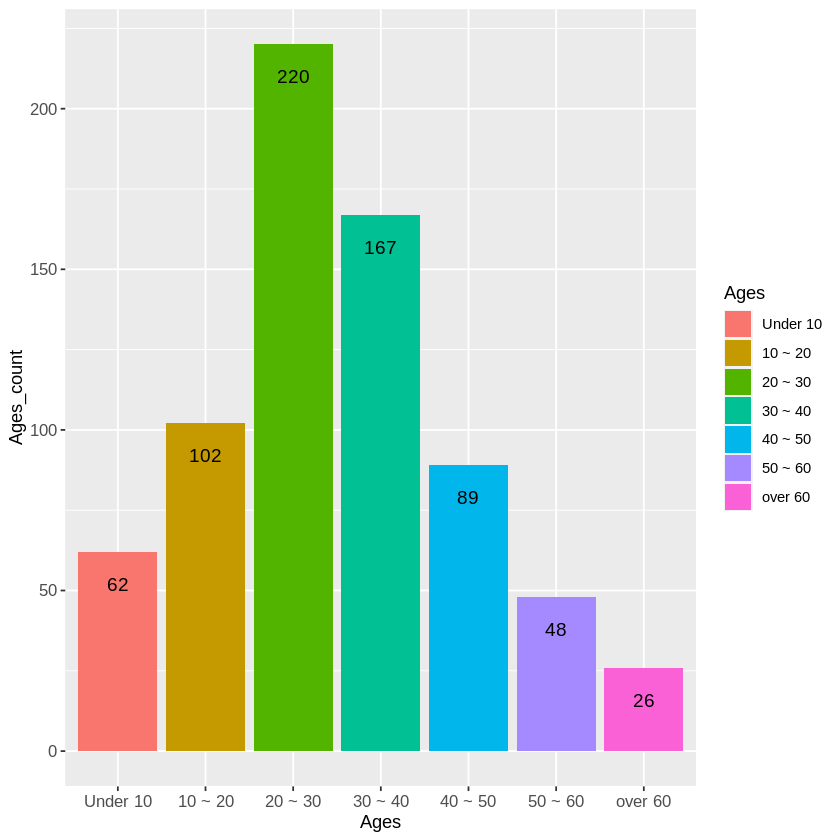

In [ ]:
#나이 데이터 전처리
titanic_data <- titanic_data %>%
  mutate(Ages = case_when(
    Age < 10 ~ "Under 10",
    Age < 20 ~ "10 ~ 20",
    Age < 30 ~ "20 ~ 30",
    Age < 40 ~ "30 ~ 40",
    Age < 50 ~ "40 ~ 50",
    Age < 60 ~ "50 ~ 60",
    TRUE ~ "over 60"
  ))

titanic_data$Ages <-
  factor(titanic_data$Ages,
         levels = c("Under 10", "10 ~ 20", "20 ~ 30", "30 ~ 40", "40 ~ 50", "50 ~ 60", "over 60"))

data_cleanging <- titanic_data %>%
  group_by(Ages) %>%
  summarise(Ages_count = n())

ggplot(data_cleanging, aes(x = Ages, y = Ages_count, fill=Ages)) +
  geom_col() +
  geom_text(aes(label=(Ages_count)), vjust=3, hjust = 0.5,color="black", size=4) +
  theme(axis.text.x = element_text(size=10)) +
  theme(axis.text.y = element_text(size=10))

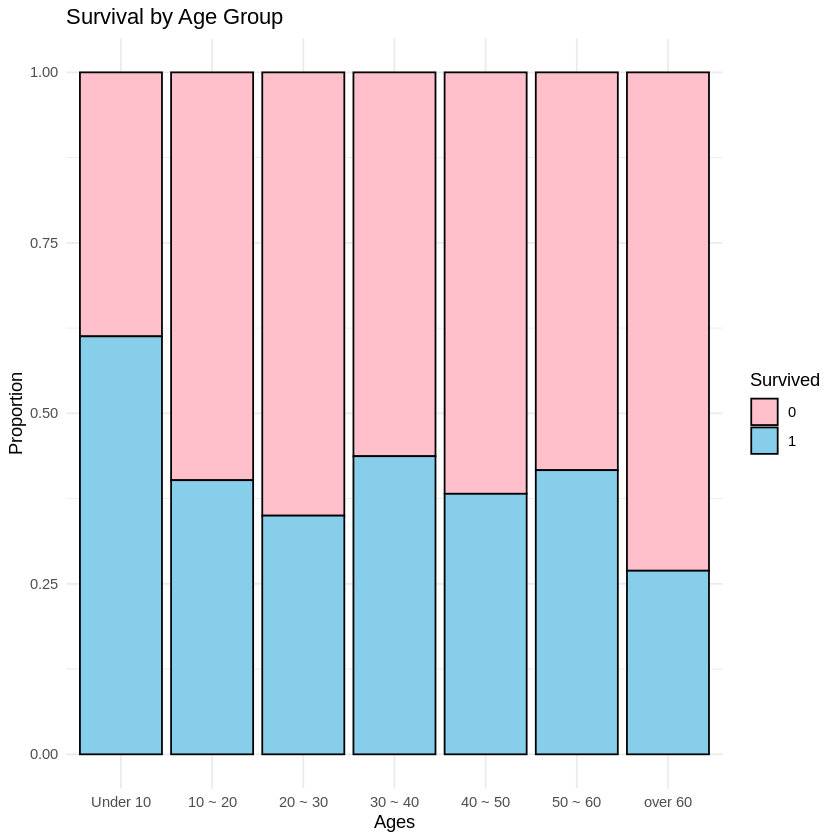

In [ ]:
ggplot(titanic_data, aes(x = Ages, fill = factor(Survived))) +
  geom_bar(position = "fill", color = "black") +
  scale_fill_manual(values = c("0" = "pink", "1" = "skyblue")) +
  ggtitle("Survival by Age Group") +
  labs(fill = "Survived", y = "Proportion") +
  theme_minimal()

### 2) 데이터 분석 절차

---


**[1단계] 문제 정의**
- 분석하고자 하는 분야를 이해하고, 해결해야 할 문제를 객관적이고 구체적으로 정의

**[2단계] 변수 검토 및 전처리**
- 변수의 특성을 파악, 이상치 정제, 파생변수 생성

**[3단계] 데이터 분석(모델링)**
- 변수 간 관계를 분석하고, 하나의 테이블 혹은 다수의 테이블을 이용하여 분석
- 탐색적 데이터 분석(EDA) or 머신러닝, 딥러닝


**[4단계] 시각화**
- 다양한 도구를 이용해 데이터 시각화, 탐색을 통해 분제 해결

**[5단계] 문제해결 및 인사이트 도출**
- 초기 정의한 문제 해결, 데이터 분석을 통한 결론/인사이트 도출


---

# **2. 성별에 따른 생존률**

**[1단계] 문제 정의**
- 1900년대 초반인 당시 시대상황에서는 lady first의 문화가 존재하여 남성이 여성을 보호하는 것이 옳다고 여겼기 때문에 여성의 생존률이 더 높을 것으로 가정.
-데이터 분석을 통해 성별에 따른 생존률의 차이가 있는지 확인.

**[2단계] 변수 검토 및 전처리**
- 필요한 부분의 변수를 검토 하였고, 이미 전처리 완료되었으므로 생략한다.






**[3단계] 데이터 분석(모델링)**

In [ ]:
gender_survival <- titanic_data %>%
  group_by(Gender) %>%
  summarise(Survival_Rate = mean(Survived))

**[4단계] 시각화**



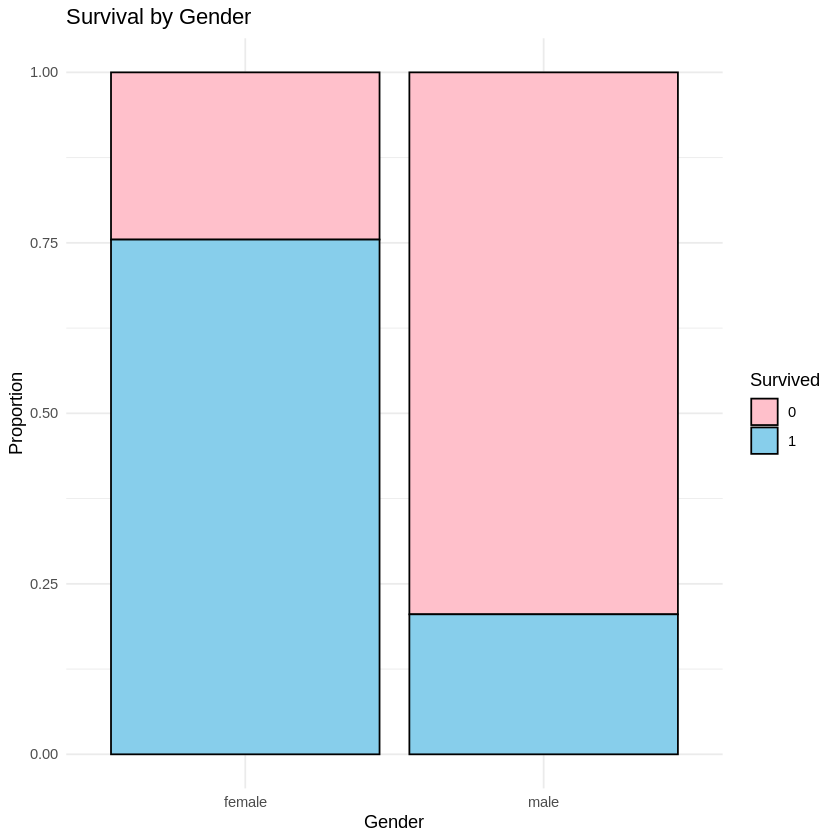

In [ ]:
ggplot(titanic_data, aes(x = Gender, fill = factor(Survived))) +
  geom_bar(position = "fill", color = "black") +
  scale_fill_manual(values = c("0" = "pink", "1" = "skyblue")) +
  ggtitle("Survival by Gender") +
  labs(fill = "Survived", y = "Proportion") +
  theme_minimal()

**[5단계] 문제해결 및 인사이트 도출**
- 분석 결과 여성이 남성보다 생존 확률이 높다는 것이 입증되었으므로, 이는 당시 상황에서의 구조 원칙이 실제로 적용되었음을 나타낸다.

- 재난 시 구조 활동에서의 성별 차별을 최소화하고, 모든 사람에게 동등한 기회를 제공하는 것이 중요하다. 구조 계획을 수립할 때 성별을 고려하지 않고 공정하게 대우하는 방안을 마련할 수 있다.

#**3. 객실 등급에 따른 생존율**

**[1단계] 문제 정의**
- 높은 등급의 객실일수록 안전위험이 적은 방으로 지정되거나, 대비책이 더 잘 마련되어있을 확률이 높기 때문에 높은 객실 등급일수록 생존률 높다고 가정.
-데이터 분석을 통해 객실 등급에 따른 생존률의 차이가 있는지 확인.

**[2단계] 변수 검토 및 전처리**
- 필요한 부분의 변수를 검토 하였고, 이미 전처리 완료되었으므로 생략한다.

**[3단계] 데이터 분석(모델링)**

In [ ]:
# 3. 승객 등급에 따른 생존율 분석
class_survival <- titanic_data %>%
  group_by(Pclass) %>%
  summarise(Survival_Rate = mean(Survived))

**[4단계] 시각화**

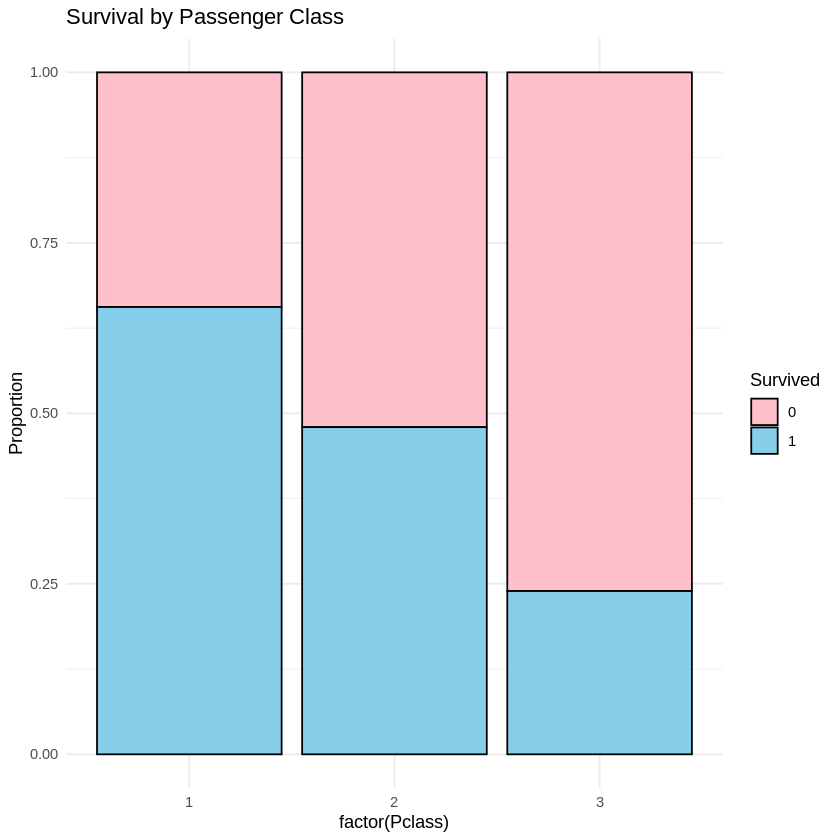

In [ ]:
ggplot(titanic_data, aes(x = factor(Pclass), fill = factor(Survived))) +
  geom_bar(position = "fill", color = "black") +
  scale_fill_manual(values = c("0" = "pink", "1" = "skyblue")) +
  ggtitle("Survival by Passenger Class") +
  labs(fill = "Survived", y = "Proportion") +
  theme_minimal()

**[5단계] 문제해결 및 인사이트 도출**
- 높은 등급의 객실일수록 생존 확률이 높다면, 이는 사회적 지위가 생존에 영향을 미쳤음을 나타낸다.

- 모든 승객이 동등한 구조 기회를 가지도록 구조 계획을 개선해야 한다. 구조 시 승객 등급에 상관없이 공정하게 대우하도록 교육하고 훈련을 강화 할 필요성이 존재한다.

# **4. 형제/자매 및 배우자 수에 따른 생존율**

**[1단계] 문제 정의**
- 형제/자매 및 배우자 수가 적을수록 생존 확률이 높았을 것으로 가정한다.
- 동반자가 많은 승객은 구조 과정에서 어려움을 겪었을 가능성이 높다.
- 동반자 수와 생존 여부를 분석하여 차이 존재하는지 확인한다.

**[2단계] 변수 검토 및 전처리**
- 필요한 부분의 변수를 검토 하였고, 이미 전처리 완료되었으므로 생략한다.

**[3단계] 데이터 분석(모델링)**

In [ ]:
# 4. 형제/자매 및 배우자 수에 따른 생존율 분석
sibsp_survival <- titanic_data %>%
  group_by(SibSp) %>%
  summarise(Survival_Rate = mean(Survived))

**[4단계] 시각화**

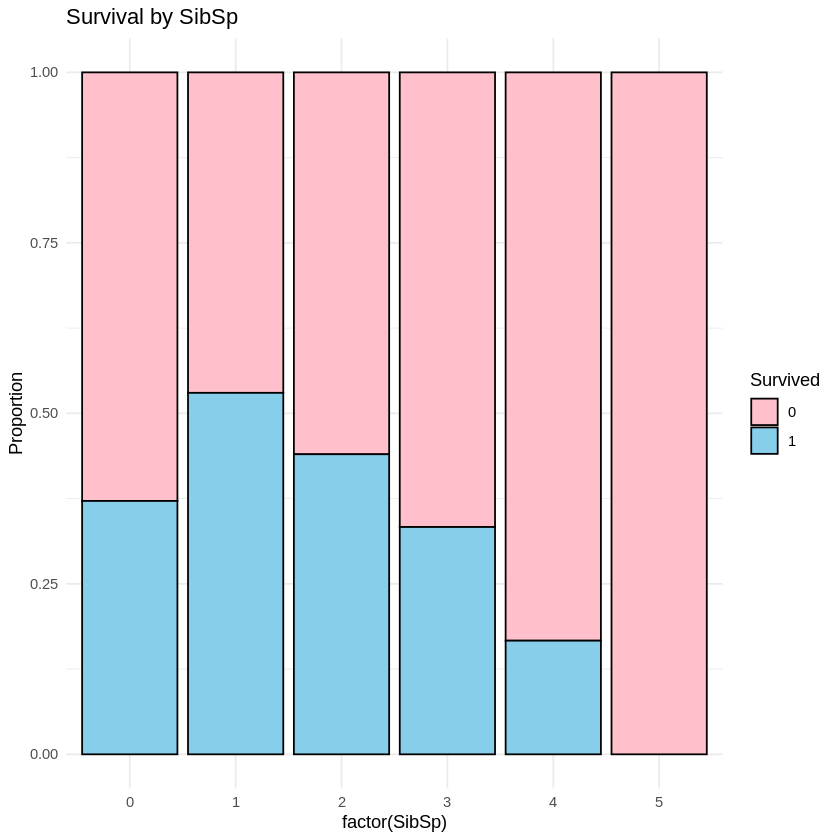

In [ ]:
ggplot(titanic_data, aes(x = factor(SibSp), fill = factor(Survived))) +
  geom_bar(position = "fill", color = "black") +
  scale_fill_manual(values = c("0" = "pink", "1" = "skyblue")) +
  ggtitle("Survival by SibSp") +
  labs(fill = "Survived", y = "Proportion") +
  theme_minimal()


**[5단계] 문제해결 및 인사이트 도출**

- 유의미하게 차이가 존재한다고 보기는 어렵지만, 동반자가 많을수록 생존 확률이 낮아진다.
- 가족 구성원이 많을 시에 안전수칙을 미리 고지하여 예방할 필요성이 존재한다.


# **5. 부모 및 자녀 수에 따른 생존율 분석**

**[1단계] 문제 정의**
  
- 부모 및 자녀 수가 적을수록 생존 확률이 높았을 것으로 가정한다.
- 가족 구성원이 많을수록 구조 과정에서 어려움을 겪었을 가능성이 존재한다.
- 부모 및 자녀 수와 생존 여부를 분석하여 차이를 확인한다.

**[2단계] 변수 검토 및 전처리**
- 필요한 부분의 변수를 검토 하였고, 이미 전처리 완료되었으므로 생략한다.

**[3단계] 데이터 분석(모델링)**

In [ ]:
# 6. 부모 및 자녀 수에 따른 생존율 분석
parch_survival <- titanic_data %>%
  group_by(Parch) %>%
  summarise(Survival_Rate = mean(Survived))

**[4단계] 시각화**

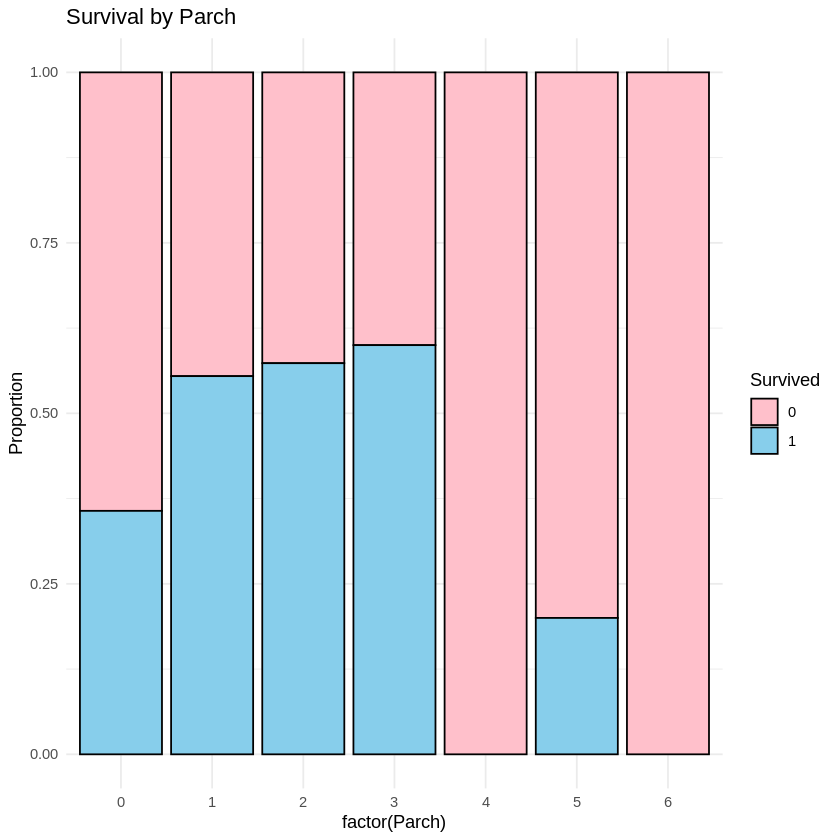

In [ ]:
ggplot(titanic_data, aes(x = factor(Parch), fill = factor(Survived))) +
  geom_bar(position = "fill", color = "black") +
  scale_fill_manual(values = c("0" = "pink", "1" = "skyblue")) +
  ggtitle("Survival by Parch") +
  labs(fill = "Survived", y = "Proportion") +
  theme_minimal()


**[5단계] 문제 해결 및 인사이트 도출**
- 자녀가 없는 부모와 있는 부모의 생존율 차이가 비슷하거나 자녀가 없는 부모의 생존율이 더 낮다.
- 자녀가 많을수록 생존률이 낮다고 보다는 어렵다.

# **7. 탑승지에 따른 생존율**

**[1단계] 문제 정의**
- 특정 탑승지에서 탑승한 승객들의 생존 확률이 높았을 것으로 가정한다.
- 탑승지에 따라 승객들의 사회적 배경이 달랐을 수 있으며, 이는 생존에 영향을 미쳤을 가능성이 있습니다.
- 탑승지와 생존 여부의 관계를 파악한다.

**[2단계] 변수 검토 및 전처리**
- 필요한 부분의 변수를 검토 하였고, 이미 전처리 완료되었으므로 생략한다.

**[3단계] 데이터 분석(모델링)**

In [ ]:
# 7. 탑승지에 따른 생존율 분석
embarked_survival <- titanic_data %>%
  group_by(Embarked) %>%
  summarise(Survival_Rate = mean(Survived))

In [ ]:
# 각 탑승지에 따른 객실 등급의 비율 계산
embarked_class_ratio <- titanic_data %>%
  group_by(Embarked, Pclass) %>%
  summarise(Count = n()) %>%
  mutate(Total = sum(Count),
         Proportion = Count / Total * 100)

# 비율을 보기 쉽게 정렬
embarked_class_ratio <- embarked_class_ratio %>%
  arrange(Embarked, Pclass)

print(embarked_class_ratio)


`summarise()` has grouped output by 'Embarked'. You can override using the
`.groups` argument.


# A tibble: 10 × 5
# Groups:   Embarked [4]
   Embarked Pclass Count Total Proportion
   <chr>    <fct>  <int> <int>      <dbl>
 1 ""       1          2     2     100   
 2 "C"      1         74   130      56.9 
 3 "C"      2         15   130      11.5 
 4 "C"      3         41   130      31.5 
 5 "Q"      1          2    28       7.14
 6 "Q"      2          2    28       7.14
 7 "Q"      3         24    28      85.7 
 8 "S"      1        108   554      19.5 
 9 "S"      2        156   554      28.2 
10 "S"      3        290   554      52.3 


**[4단계] 시각화**



(1) 탑승지에 따른 생존율

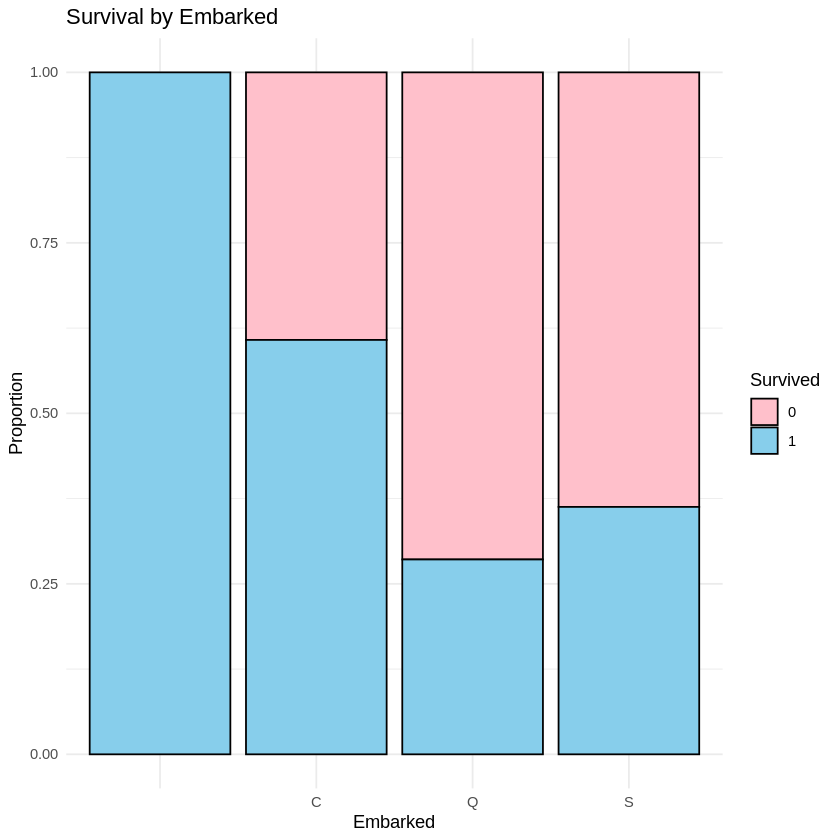

In [ ]:
ggplot(titanic_data, aes(x = Embarked, fill = factor(Survived))) +
  geom_bar(position = "fill", color = "black") +
  scale_fill_manual(values = c("0" = "pink", "1" = "skyblue")) +
  ggtitle("Survival by Embarked") +
  labs(fill = "Survived", y = "Proportion") +
  theme_minimal()

(2) 각 탑승지별 객실등급 비율

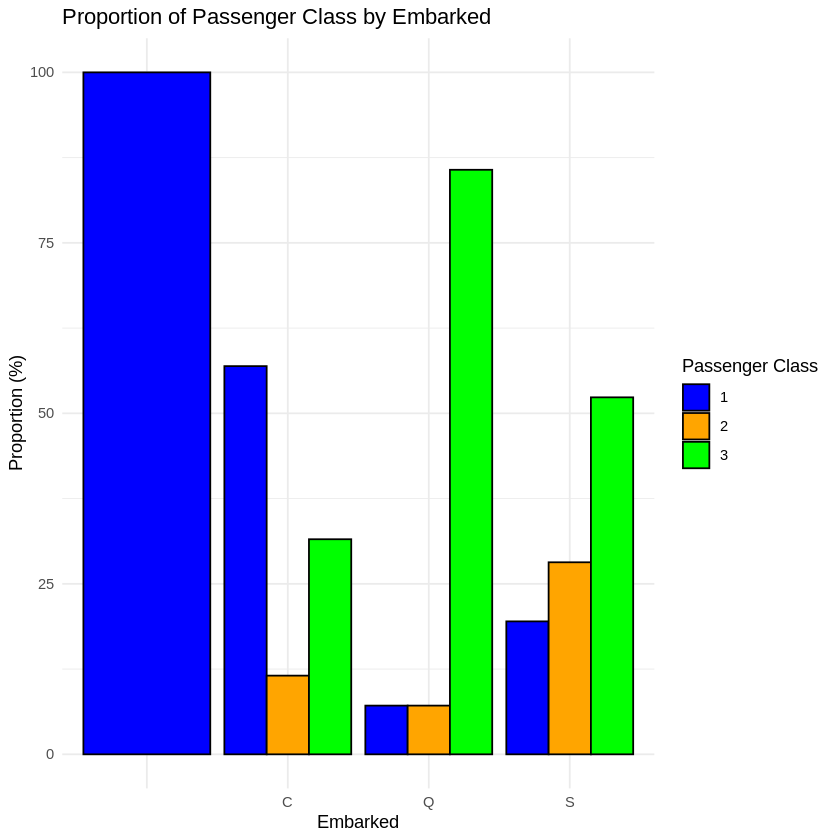

In [ ]:
ggplot(embarked_class_ratio, aes(x = Embarked, y = Proportion, fill = factor(Pclass))) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  scale_fill_manual(values = c("1" = "blue", "2" = "orange", "3" = "green")) +
  ggtitle("Proportion of Passenger Class by Embarked") +
  labs(fill = "Passenger Class", y = "Proportion (%)", x = "Embarked") +
  theme_minimal()

**[5단계] 문제 해결 및 인사이트 도출**
- 생존율이 가장 높은 c탑승지는 1등급 객실의 비율이 가장 높았고, 생존율이 가장 낮은 q탑승지는 3등급 객실의 비율이 가장 낮았다.
- 이는 경제적 지위에 따라 생명과 관련된 차별이 존재하는 것이므로, 2,3등급 객실에도 안전과 관련된 예방책이 잘 마련되어야 한다고 볼 수 있다.

# **8. 이름에서 추출한 타이틀에 따른 생존 여부 분석**

**[1단계] 문제 정의**
- 어린 아이들과 여성을 칭하는 이름의 타이틀이 생존율이 높다고 가정한다.

**[2단계] 변수 검토 및 전처리**

In [ ]:
# 이름에서 타이틀 추출
titanic_data$Title <- sapply(titanic_data$Name, function(x) {str_trim(strsplit(x, split = '[,.]')[[1]][2])})

# 타이틀을 5가지 주요 그룹으로 분류
titanic_data$Title_Group <- titanic_data$Title
titanic_data$Title_Group <- ifelse(titanic_data$Title_Group %in% c("Mr", "Mrs", "Miss", "Master"), titanic_data$Title_Group, "Other")


**[3단계] 데이터 분석(모델링)**

**[4단계] 시각화**

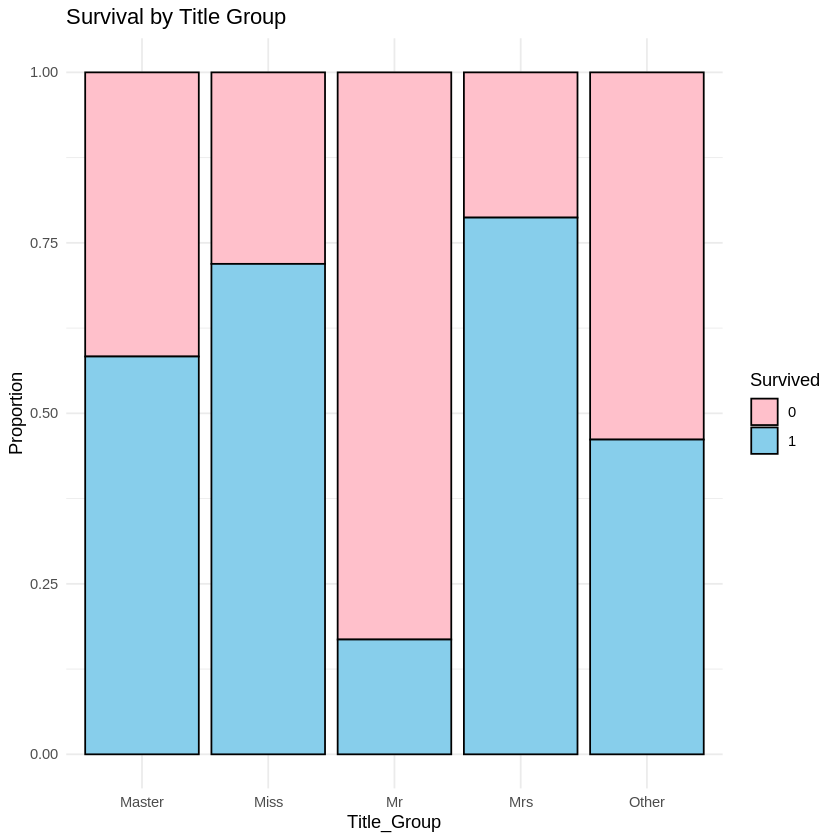

In [ ]:
# 타이틀 그룹별로 생존 여부 시각화
ggplot(titanic_data, aes(x = Title_Group, fill = factor(Survived))) +
  geom_bar(position = "fill", color = "black") +
  scale_fill_manual(values = c("0" = "pink", "1" = "skyblue")) +
  ggtitle("Survival by Title Group") +
  labs(fill = "Survived", y = "Proportion") +
  theme_minimal()


**[5단계] 문제 해결 및 인사이트 도출**
- 분석 결과 여성과 아이들이 남자보다 생존 확률이 높다는 것이 입증되었으므로, 이는 구조 원칙(여성과 아이들 우선)이 실제로 적용되었음을 나타낸다.
- 재난 시 구조 활동에서의 성별 차별을 최소화하고, 모든 사람을 동등하게 구할 수 있는 구조 계획 방안을 마련해야 한다.

# **결론**

- 사회적 지휘와 당시 시대상황에 따라, 생존률의 차이가 나타남을 알 수 있다.
- 현시대에서도 여전히 사회적 지휘에 따라 재난 상황에서 생존의 차이가 발생할 수 있기 때문에 이러한 점을 고려하여 재난 대응 정책을 수립할 수 있도록해야한다.
- 취약헌 그룹에 대한 보호와 구조 기회를 보장할 필요성이 존재한다.